#**Coding session1 -Working with Dicom images**

# What shall we cover?
Read in single Dicom image
 * Print header information (full, partial)
 * Display Dicom image 
 * Use Dicom info on single image to display/ filter image contents
 * Practice session 
     * Read in a MRI Dicom image
     * Display image and info on patient id, imaging modality, MR acquisition type, Magnetic field strength image size

# Dataset used:

OSIC Pulmonary Fibrosis Progression dataset

Open source, format .dcm

In the dataset, you are provided with a baseline chest CT scan and associated clinical information for a set of patients. It can be used to predict lung function decline in patients



# Install pydicom library

In [ ]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.4 MB/s 


# Load google drive where data is stored 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Specify path to Dicom image

In [ ]:
file_path= '/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/15.dcm'

#Read a Dicom image

In [ ]:
import pydicom
sample = pydicom.dcmread(file_path)

#Display Dicom image

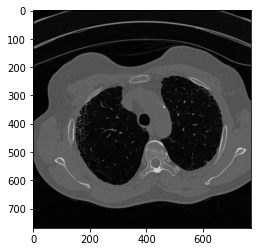

In [ ]:
import matplotlib.pyplot as plt

arr = sample.pixel_array
plt.imshow(arr, cmap="gray")

#Print all header information

In [ ]:
sample

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423819.184403
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0008) Image Type                          CS: '1'
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.0.37492.1591423819.184403
(0008, 0060) Modality                            CS: 'CT'
(0008, 0070) Manufacturer                        LO: 'SIEMENS'
(0008, 1090) Manufacturer's Model

#Print all information keys within Dicom header

In [ ]:
sample.dir()

['BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConvolutionKernel',
 'DeidentificationMethod',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientPosition',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'RescaleIntercept',
 'RescaleSlope',
 'RescaleType',
 'RotationDirection',
 'Rows',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesInstanceUID',
 'SliceLocation',
 'SliceThickness',
 'StudyID',
 'StudyInstanceUID',
 'TableHeight',
 'WindowCenter',
 'WindowWidth',
 'XRayTubeCurrent']

# Important attributes:

* Body Part Examined   
* Device details
* Modality
* Manufacturer
* Manufacturer's Model Name
* Photometric Interpretation
* Bits Allocated

#Query and print specific information from Dicom header

In [ ]:
def show_dcm_info(dataset):
    
    print("Patient id..........:", dataset.PatientID)
    print("Body part examined.......:", dataset.BodyPartExamined)
    print("Modality............:", dataset.Modality)
    print("Device manufacturer..:", dataset.Manufacturer)
    print("Device model.......:", dataset.ManufacturerModelName)
    
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

In [ ]:
show_dcm_info(sample)

Patient id..........: ID00421637202311550012437
Body part examined.......: Chest
Modality............: CT
Device manufacturer..: SIEMENS
Device model.......: OsiriX
Image size.......: 768 x 768, 1179648 bytes
Pixel spacing....: [0.415365, 0.415365]


#Use Dicom header information to filter parts of image and display

(array([3.17612e+05, 1.41480e+04, 1.54900e+04, 1.85859e+05, 4.79150e+04,
        5.21200e+03, 1.99400e+03, 1.03000e+03, 5.16000e+02, 4.80000e+01]),
 array([   0. ,  278.5,  557. ,  835.5, 1114. , 1392.5, 1671. , 1949.5,
        2228. , 2506.5, 2785. ]),
 <a list of 10 Patch objects>)

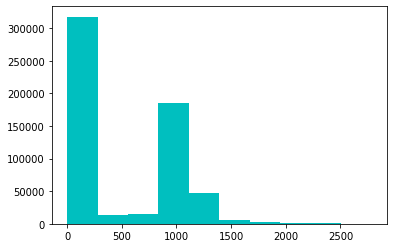

In [ ]:
sample.pixel_array, sample.pixel_array.shape
px = sample.pixel_array.flatten()
plt.hist(px, color='c')  # Histogram of CT intensities

# Image processing using Dicom header information

#Hounsfield Unit (HU) 
Computed Tomography scans produce images of the body using X-rays. We can use a head CT to evaluate various structures of the brain and look for abnormalities, areas of bleeding, stroke, where the brain's blood supply is inadequate, among other things.

The unit of measurement in CT scans is the Hounsfield Unit (HU) which is a measure of radiodensity. Each voxel (3D pixel) of a CT scan has an attenuation value that is the measure of the reduction intensity of a ray of light by the tissue through it passes.

# Function to convert CT image intesities to Hounsfield Units

In [ ]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

# Plot histogram of Hounsfield Unit values

(array([[614.,   8.,  12., ...,   0.,   0.,   0.],
        [609.,   9.,  17., ...,   0.,   0.,   0.],
        [605.,   9.,  23., ...,   0.,   0.,   0.],
        ...,
        [456.,   6.,  17., ...,   0.,   0.,   0.],
        [458.,   7.,  15., ...,   0.,   0.,   0.],
        [457.,  10.,  15., ...,   0.,   0.,   0.]]),
 array([-1024. ,  -745.5,  -467. ,  -188.5,    90. ,   368.5,   647. ,
          925.5,  1204. ,  1482.5,  1761. ]),
 <a list of 768 Lists of Patches objects>)

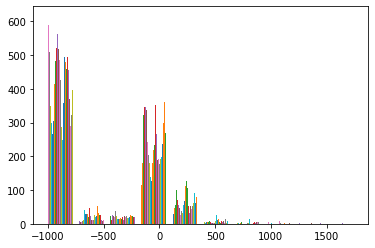

In [ ]:
im1= sample.pixel_array
hu_ct= transform_to_hu(sample, im1)
plt.hist(hu_ct)

In [ ]:
image = sample.pixel_array
print(hu_ct.min())
print(hu_ct.max())

-1024.0
1761.0


# Windowing
We use a technique called windowing to limit the number of Hounsfield units that are displayed. For example if we want to examine the soft tissue in one CT scan we can use a window level of 40 and a window Width of 80 this will cover 40 units below and above the window level and the tissues with CT numbers outside this range will appear either black or white. A narrow range provides a higher contrast.

HU Units range and corresponding CT image contents

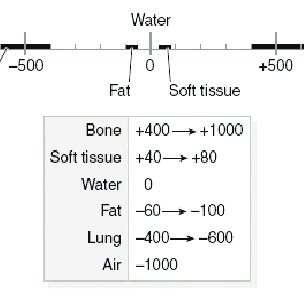

In [ ]:
def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

# Display bone like regions

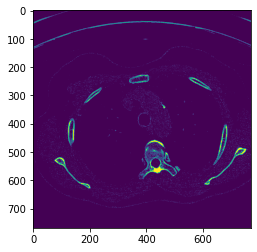

In [ ]:
bone= window_image(hu_ct, 400, 600)
plt.imshow(bone)


# Display soft tissue regions

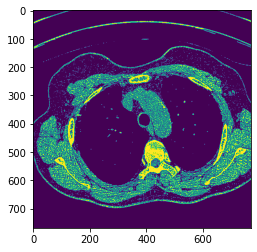

In [ ]:
soft_tissue_regions = window_image(hu_ct, 40,40)
plt.imshow(soft_tissue_regions)

# Display lung spaces

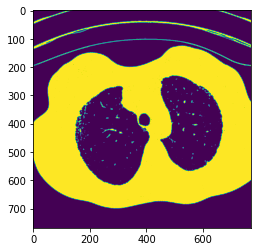

In [ ]:
lung_regions = window_image(hu_ct, -400, 200)
plt.imshow(lung_regions)

# Practice session 1: Read in a MRI dicom image, display image and info on patient id, imaging modality, MR acquisition type, Magnetic field strength image size

Dataset: RSNA-MICCAI Brain Tumor Radiogenomic Classification

In [ ]:
file_path_mri= '/content/drive/My Drive/colab_notebooks/lp_covid/beta_tested_notebooks/Image-105_brain1.dcm'

In [ ]:
import pydicom
import matplotlib.pyplot as plt

sample_mri = pydicom.dcmread(file_path_mri)

# Display image and info on patient id, imaging modality, MR acquisition type, Magnetic field strength image size

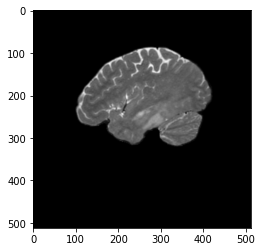

In [ ]:
arr_mri = sample_mri.pixel_array
plt.imshow(arr_mri, cmap="gray")

In [ ]:
sample_mri.dir()

['AccessionNumber',
 'AcquisitionMatrix',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InStackPositionNumber',
 'InstanceNumber',
 'Laterality',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Modality',
 'NumberOfAverages',
 'PatientID',
 'PatientName',
 'PatientPosition',
 'PercentPhaseFieldOfView',
 'PercentSampling',
 'PhotometricInterpretation',
 'PixelBandwidth',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'ReconstructionDiameter',
 'RescaleIntercept',
 'RescaleSlope',
 'RescaleType',
 'Rows',
 'SAR',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SliceLocation',
 'SliceThickness',
 'SpacingBetweenSlices',
 'SpecificCharacterSet',
 'StudyInstanceUID',
 

In [ ]:
def show_dcm_info(dataset):
    
    print("Patient id..........:", dataset.PatientID)
    print("MR acquisition type.......:", dataset.MRAcquisitionType)
    print("Modality............:", dataset.Modality)
    print("Magnetic field strength..:", dataset.MagneticFieldStrength)
    
    
    if 'PixelData' in dataset:
        rows = int(dataset.Rows)
        cols = int(dataset.Columns)
        print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
            rows=rows, cols=cols, size=len(dataset.PixelData)))
        if 'PixelSpacing' in dataset:
            print("Pixel spacing....:", dataset.PixelSpacing)

In [ ]:
show_dcm_info(sample_mri)

Patient id..........: 00688
MR acquisition type.......: 3D
Modality............: MR
Magnetic field strength..: 3
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.5, 0.5]
